# Redes Bayesianas
Las redes Bayesianas corresponden a un caso particular de factorización de una probabilidad conjunto en que cada factor es también una distribución.

El criterio para detectar independencia entre condicional en un grafo probabilístico corresponde a la d-separación, que nos dice que si $x_i$ y $x_j$ están bloqueados por un subconjunto $S \in X \setminus \{x_i,x_j\}$ de las variables, entonces $x_i$ es independiente de $x_j$ dado $S$. Esto nos lleva también a concluir que en un árbol, cada variable $x_i$ es independiente de sus hijos y sus abuelos, dado el valor de las variables en el conjunto $S$ que contiene a sus padres. 


En general, podemos decir que podemos garantizar que $x_i \perp x_j \vert S$,si no existe ninguna ruta activa entre ambos vertices. Una ruta se dice activa si todas las tripletas que la componen se encuentran activas.

In [1]:
import pgmpy
from pgmpy.readwrite import BIFReader

In [2]:
reader=BIFReader('data/asia.bif')
model=reader.get_model()

In [3]:
model.nodes()

['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']

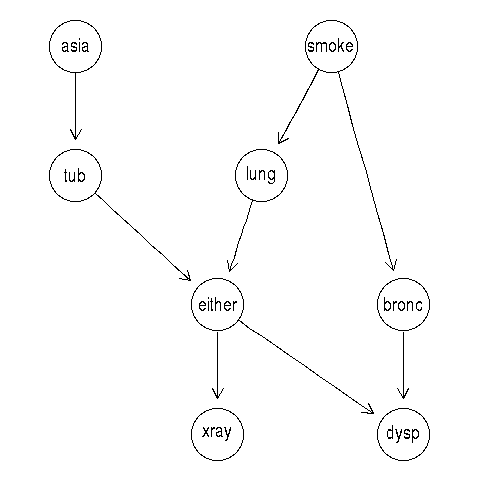

In [4]:
from IPython.display import Image
Image('data/asia.png')

In [5]:
model.is_active_trail('tub', 'smoke', observed='dysp')

True

In [6]:
model.is_active_trail('lung', 'bronc', observed='smoke')

False

In [7]:
model.is_active_trail('asia', 'smoke', observed='lung')

False

In [8]:
model.is_active_trail('asia', 'smoke', observed=['lung','dysp'])

True

In [9]:
model.get_independencies()

(asia _|_ lung, smoke, bronc)
(asia _|_ xray | either)
(asia _|_ dysp, smoke, bronc, lung, either, xray | tub)
(asia _|_ smoke, bronc | lung)
(asia _|_ lung, bronc | smoke)
(asia _|_ lung, smoke | bronc)
(asia _|_ xray | dysp, either)
(asia _|_ smoke, bronc, lung, either, xray | dysp, tub)
(asia _|_ dysp, bronc, lung, smoke, xray | tub, either)
(asia _|_ dysp, bronc, smoke, xray | lung, either)
(asia _|_ dysp, bronc, xray | smoke, either)
(asia _|_ dysp, xray | either, bronc)
(asia _|_ dysp, smoke, lung, either, bronc | tub, xray)
(asia _|_ smoke, bronc | lung, xray)
(asia _|_ bronc | smoke, xray)
(asia _|_ dysp, smoke, bronc, either, xray | lung, tub)
(asia _|_ dysp, bronc, lung, either, xray | tub, smoke)
(asia _|_ dysp, smoke, lung, either, xray | tub, bronc)
(asia _|_ bronc | lung, smoke)
(asia _|_ smoke | lung, bronc)
(asia _|_ lung | smoke, bronc)
(asia _|_ xray, lung, smoke, bronc | dysp, tub, either)
(asia _|_ xray, smoke, bronc | dysp, lung, either)
(asia _|_ xray, bronc | dys

In [10]:
model.local_independencies('tub')

(tub _|_ lung, smoke, bronc | asia)

In [12]:
model.is_active_trail('lung', 'tub', observed='either')

True